                Word  Rank Frequency K / Proportionality Constant
0               word     1       134                          134
1          frequency     2       129                          258
2                law     3       119                          357
3              words     4       108                          432
4       distribution     5       104                          520
...              ...   ...       ...                          ...
1885           input  1886         1                         1886
1886  responsibility  1887         1                         1887
1887     necessarily  1888         1                         1888
1888        official  1889         1                         1889
1889           views  1890         1                         1890

[1890 rows x 4 columns]
Frequency distribution of top 30 frequent words:


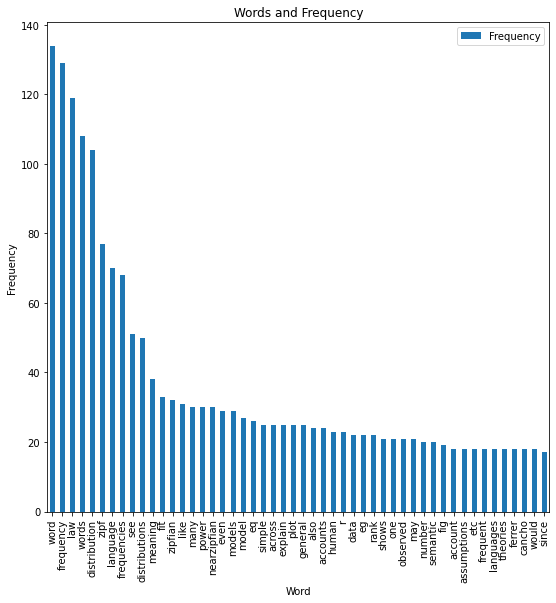

In [1]:
#import the required libraries
from nltk.tokenize import word_tokenize
from operator import itemgetter
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

import nltk
import pandas as pd
import string

#read the Corpus file
corpus_filename = 'Text_3.txt'
corpus_file = open(corpus_filename, 'rt')
corpus_text = corpus_file.read()
corpus_file.close()


# %% Cleaning of data in corpus file for easy and accurate calculation of frequency and ranking distribution

#tokenize the words in corpus text file using NLTK library
tokens = word_tokenize(corpus_text)

#for normalising all the words, convert them to lower case
tokens = [w.lower() for w in tokens]

#getting rid of punctuations and other characters
punctuation_chars = str.maketrans('', '', string.punctuation)
tokens_stripped = [w.translate(punctuation_chars) for w in tokens]

#getting rid of non alphabetic words
words = [word for word in tokens_stripped if word.isalpha()]

#getting rid of stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]

#calculating the frequency distribution of words
frequency = {}
for word in words :
    count = frequency.get(word , 0)
    frequency[ word ] = count + 1


#sorting the items in the frequency list
collection = sorted(frequency.items(), key=itemgetter(1), reverse = True)

#creating a datframe to store the values
column_header = ['Word','Rank', 'Frequency', 'K / Proportionality Constant']
df = pd.DataFrame( columns = column_header )



#calculating rank of corresponding word's frequency distribution and also the proportionality constant (K) = rank * frequency

#initialize the rank to 1
rank = 1

i=0
for word , freq in collection:
    df.loc[i] = [word, rank, freq, rank*freq]
    rank = rank + 1
    i= i+1
print(df)
# %% plotting our findings

#words and their frequecy
print('Frequency distribution of top 30 frequent words:')
ax = df[:50].plot(x='Word', y='Frequency', kind='bar', title ="Words and Frequency", figsize=(9, 9), legend=True)
ax.set_xlabel("Word")
ax.set_ylabel("Frequency")
plt.show()



Ranking distributition of top 30 words:


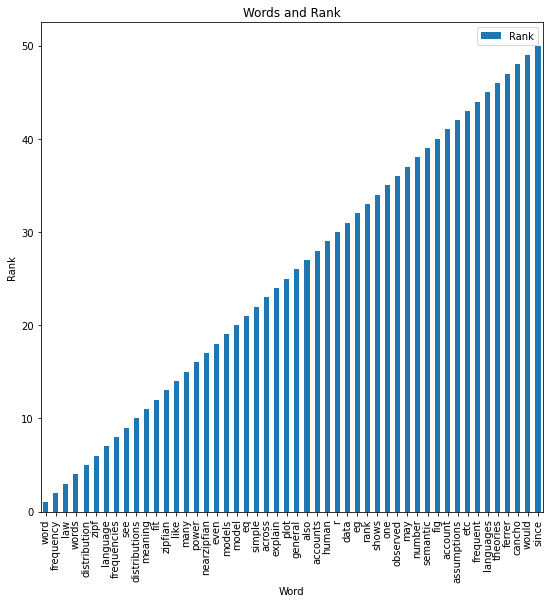

In [2]:
#words and their ranks
print('Ranking distributition of top 30 words:')
ax = df[:50].plot(x='Word', y='Rank', kind='bar', title ="Words and Rank", figsize=(9, 9), legend=True)
ax.set_xlabel("Word")
ax.set_ylabel("Rank")
plt.show()


Top 30 Words - their corresponding frequency, Rank and K


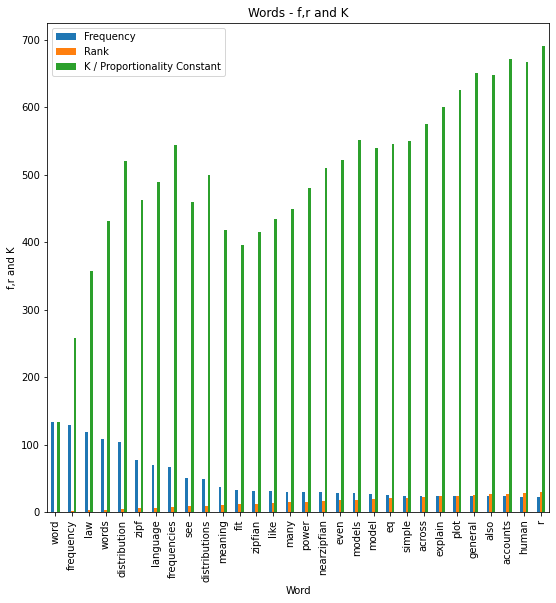

In [3]:

#words - frequency, rank and K
print('Top 30 Words - their corresponding frequency, Rank and K')
ax = df[:30].plot(x='Word', y=['Frequency','Rank','K / Proportionality Constant'], kind='bar', title ="Words - f,r and K", figsize=(9, 9), legend=True)
ax.set_xlabel("Word")
ax.set_ylabel("f,r and K")
plt.show()

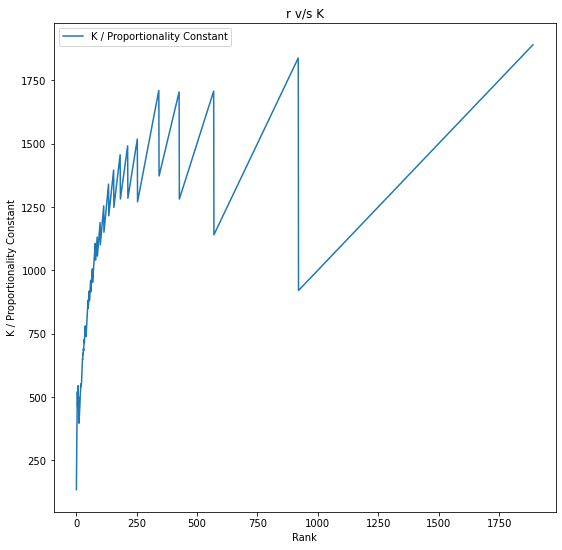

In [10]:
ax = df.plot(x='Rank', y='K / Proportionality Constant', kind='line', title ="r v/s K", figsize=(9, 9), legend=True)
ax.set_xlabel("Rank")
ax.set_ylabel("K / Proportionality Constant")
plt.show()

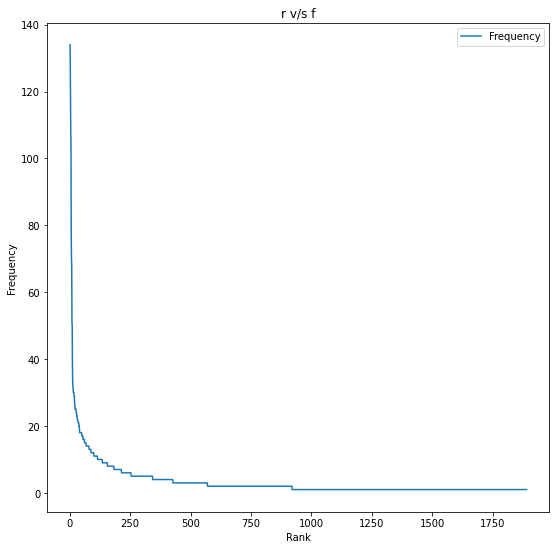

In [13]:
ax = df.plot(x='Rank', y='Frequency', kind='line', title ="r v/s f", figsize=(9, 9), legend=True)
ax.set_xlabel("Rank")
ax.set_ylabel("Frequency")
plt.show()